In [31]:
from Setup import *

import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Data Loading

In [43]:
df_train = pd.read_csv("C:/Users/maxpi/Desktop/Universität/Machine Learning/groupproject/archive (2)/train.csv") # insert file path
df_test = pd.read_csv("C:/Users/maxpi/Desktop/Universität/Machine Learning/groupproject/archive (2)/test.csv") # insert file path

df = pd.concat([df_test,df_train], ignore_index=True)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

Preprocessing

In [46]:
df.head()

,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,price
8245,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,5,Left wheel,Silver,12,13328.0
8246,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,5,Left wheel,Black,8,16621.0
8247,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,5,Right-hand drive,Black,2,8467.0
8248,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,5,Left wheel,White,0,3607.0
8249,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,5,Left wheel,Silver,4,11726.0


In [45]:
# Rework doors column
df["doors"] = df["doors"].replace({'04-May' : 5, '>5' : 5, '02-Mar' : 3} )

# Function to extract the numeric part of a string
def extract_number(x):
    # Use regex to find the first occurrence of a float or integer in the string
    import re
    match = re.search(r'(\d+\.?\d*)', str(x))
    return match.group(1) if match else None

# Clean the engine_volume column: extract the number and convert to float
df['engine_volume'] = df['engine_volume'].apply(extract_number).astype(float)

# Clean the mileage column: extract the number and convert to float
df['mileage'] = df['mileage'].apply(extract_number).astype(float)

# Delete outliers
# Delete all entries with price > 1.000.000, price < 100, no price listed, or cylinders > 16
conditions = ((df["price"] > 1000000) | (df["cylinders"] > 16) | (df["price"]<100) | (df["price"].isnull()) | (df["mileage"] > 1000000))
df_deleted = df[conditions].copy()
print(df_deleted)

df = df[~conditions].copy()
print(df.shape)

# Drop Duplicates
df = df.drop_duplicates()

# Drop Column ID
df.drop('id', axis=1, inplace=True)

#Drop Column Levy
df.drop('levy', axis=1, inplace=True)

             id  levy   manufacturer    model  prod._year   category  \
0      44020629     -     VOLKSWAGEN     Golf        2012  Hatchback   
1      45784798     -        HYUNDAI   Sonata        2012      Sedan   
2      45800257     -         NISSAN    Tiida        2005      Sedan   
3      45797981   975          VOLVO     XC90        2012       Jeep   
4      45814303     -           OPEL    Astra        1993  Hatchback   
...         ...   ...            ...      ...         ...        ...   
27409  45040734     -         TOYOTA    Prius        2013      Sedan   
27412  45799423  1995           FORD  Transit        2003   Microbus   
27444  45761409     -  MERCEDES-BENZ    C 180        1995      Sedan   
27463  45748699     -         NISSAN     Note        2006  Hatchback   
27474  39977395     -         TOYOTA    Prius        2008  Hatchback   

      leather_interior fuel_type  engine_volume       mileage  cylinders  \
0                   No    Diesel            2.0  0.000000e+

C:\Users\maxpi\AppData\Local\Temp\ipykernel_15444\2430026182.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["doors"] = df["doors"].replace({'04-May' : 5, '>5' : 5, '02-Mar' : 3} )


## Run Lasso Regression

In [ ]:
import importlib
import Lasso
importlib.reload(Lasso)


# Führe die Ridge-Regression aus
best_model, metrics = Lasso.main(df)

print(best_model.best_estimator_, metrics)

## Run Elastic Net Regression

In [24]:
import importlib
import ElasticNet
importlib.reload(ElasticNet)


# Führe die Ridge-Regression aus
best_model, metrics = ElasticNet.main(df)

print(best_model.best_estimator_, metrics)

## Run Ridge Regression

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'regressor': Ridge(), 'regressor__alpha': 1.0, 'regressor__solver': 'sparse_cg'}
Best cross-validation score: 61272668.2391
Model Performance:
MSE: 59673696.23
RMSE: 7724.88
MAE: 5925.61
R²: 0.5036


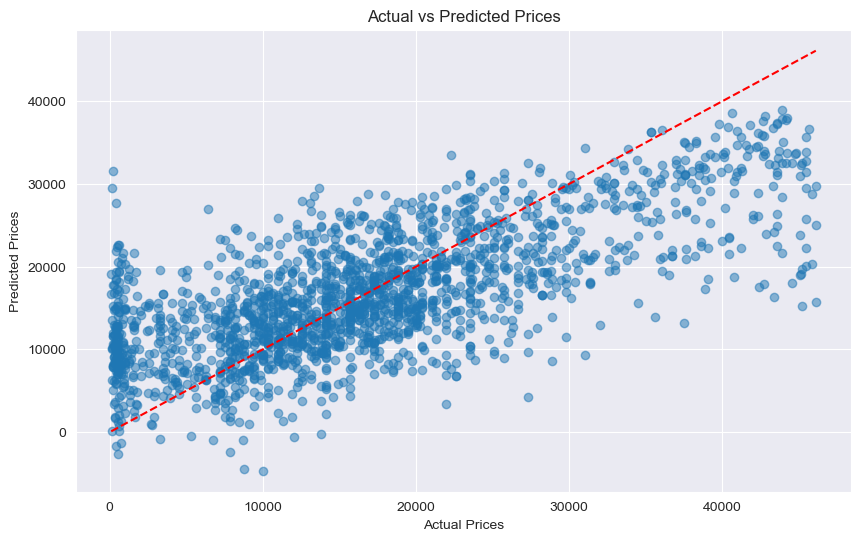

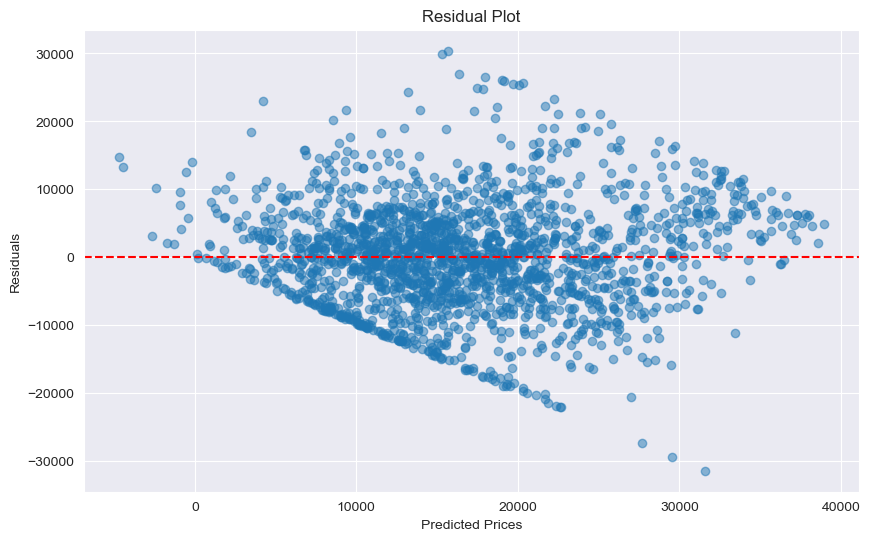

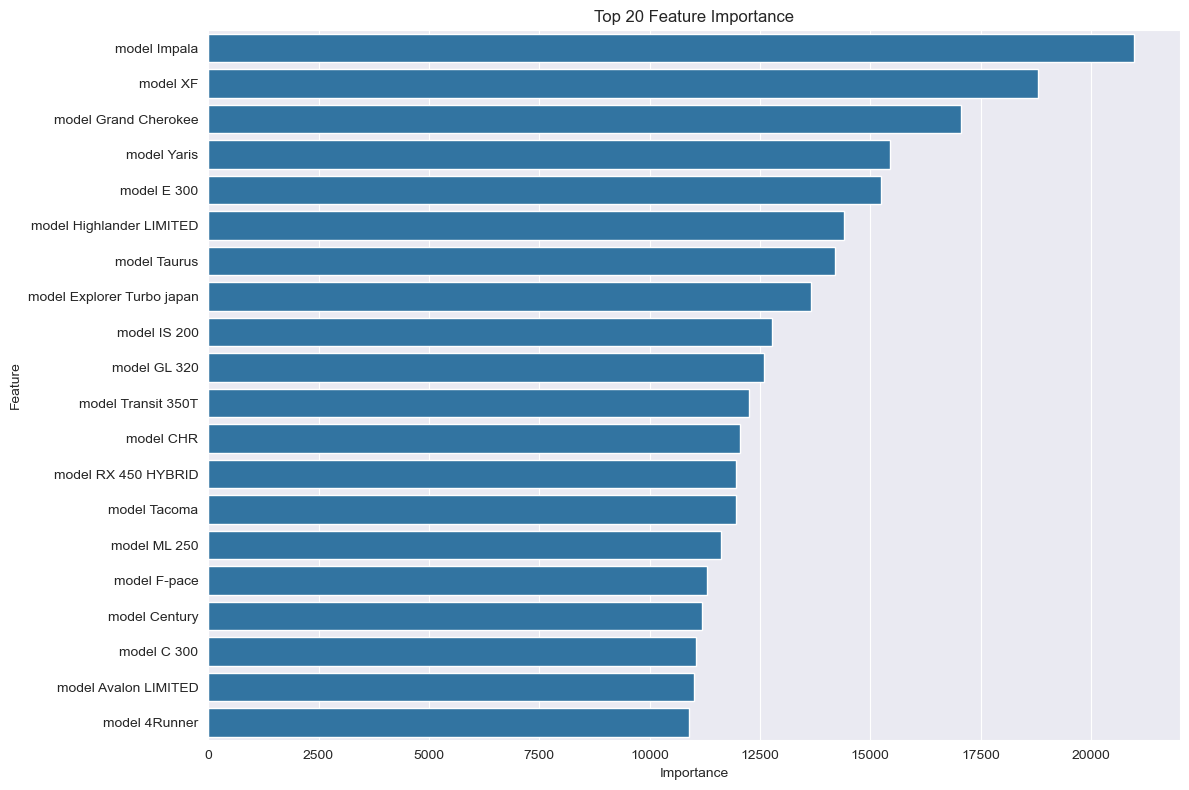

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['prod_year',
                                                   'leather_interior',
                                                   'engine_volume', 'mileage',
                                                   'cylinders', 'doors',
                                                   'airbags', 'car_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   S

In [30]:
import importlib
import Ridge
importlib.reload(Ridge)


# Führe die Ridge-Regression aus
best_model, metrics = Ridge.main(df)

print(best_model.best_estimator_, metrics)

## Run XGBoost

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 10, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 1200, 'xgb__reg_lambda': 0.3, 'xgb__subsample': 0.6}
Best CV Score (neg MSE): -46778424.44273317
Mean Squared Error (MSE): 42430345.899838924
Mean Absolute Error (MAE): 3857.792976131406
R-squared: 0.7907973032535256


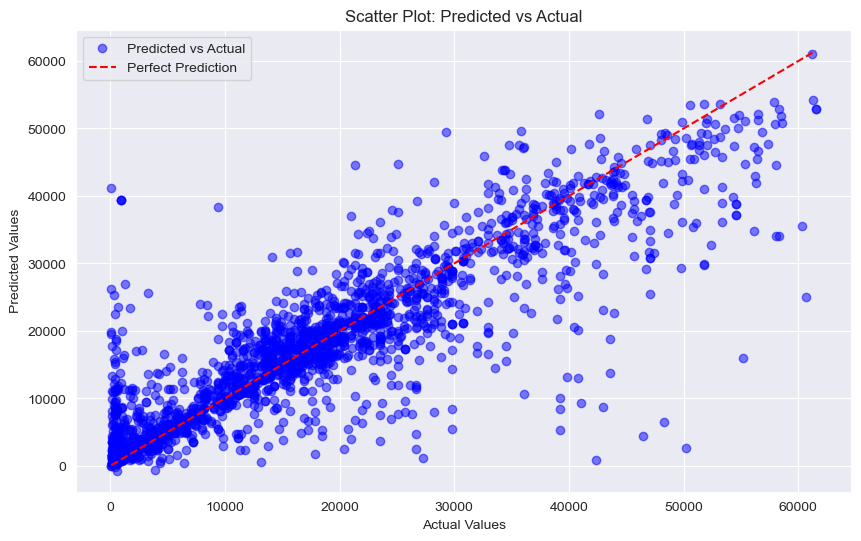

In [51]:
from XGBoost import run_xgb_regression

results = run_xgb_regression(df)
